### Introduction to Algorithmic Trading


##### Importing necessary libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

##### Some NumPy practice

In [11]:
returns_list = [3.5, 5, 2, 8, 4.2]

print('Average returns:', np.mean(returns_list))
print('SD:', np.std(returns_list))
print('Highest return:', np.max(returns_list))

Average returns: 4.54
SD: 1.9915822855207364
Highest return: 8.0


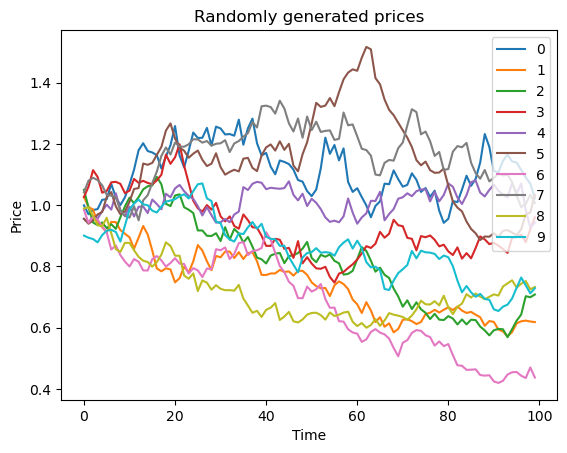

In [17]:
returns = pd.DataFrame(np.random.normal(1.0, 0.03, (100, 10)))

prices = returns.cumprod()

prices.plot()
plt.title('Randomly generated prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=0)

### Importing our data from Yahoo Finance

In [19]:
aapl = yf.Ticker('aapl')

aapl_historical = aapl.history(start='2010-01-01', end='2019-12-31', interval='1d')
aapl_historical

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 00:00:00-05:00,6.422877,6.455077,6.391278,6.440331,493729600,0.0,0.0
2010-01-05 00:00:00-05:00,6.458086,6.487878,6.417459,6.451465,601904800,0.0,0.0
2010-01-06 00:00:00-05:00,6.451465,6.477045,6.342225,6.348846,552160000,0.0,0.0
2010-01-07 00:00:00-05:00,6.372319,6.379843,6.291066,6.337109,477131200,0.0,0.0
2010-01-08 00:00:00-05:00,6.328683,6.379842,6.291368,6.379240,447610800,0.0,0.0
...,...,...,...,...,...,...,...
2019-12-23 00:00:00-05:00,67.917557,68.818186,67.878820,68.757660,98572000,0.0,0.0
2019-12-24 00:00:00-05:00,68.924716,68.973140,68.496193,68.823029,48478800,0.0,0.0
2019-12-26 00:00:00-05:00,68.956174,70.205433,68.927122,70.188484,93121200,0.0,0.0


<Axes: title={'center': 'Apple Stock Price'}, xlabel='Date'>

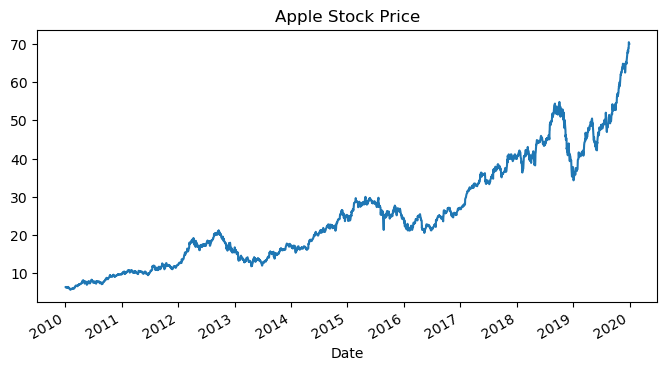

In [31]:
aapl_historical = aapl_historical.drop(columns=['Dividends', 'Stock Splits'])

aapl_historical['Open'].plot(kind='line', figsize=(8,4), title='Apple Stock Price')

#### Strategy

##### We are going to test a simple trading strategy using a technical indicator called Internal-Bar-Strength (IBS)

$$\text{IBS} = \frac{\text{Close} - \text{Low}}{\text{High} - \text{Low}}$$

##### The IBS is indicator is a number between 1 and 0, calculated using the above formula

##### Our strategy is to sell the stock after a 'good day' and buy after a 'bad day'. In other words when the IBS is below 0.1 we will take a long position and when it is above 0.9 we will take a short position

In [41]:
# Assuming you have a DataFrame 'df' with 'High', 'Low', 'Close' columns
aapl_historical['IBS'] = (aapl_historical['Close'] - aapl_historical['Low']) / (aapl_historical['High'] - aapl_historical['Low'])